<a href="https://colab.research.google.com/github/aminrezanejad20/Python_Parallel_Programming/blob/main/Parallelization_of_the_K_Nearest_Neighbor_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: iris , K = 3

best_serial_execution_time: 0.0059 S
best_accuracy_serial: 0.9667
best_parallel_execution_time: 0.0021 S
best_accuracy_parallel: 1.0000


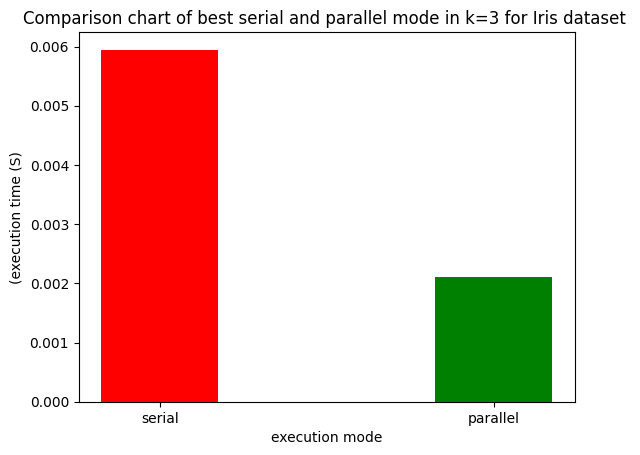

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time
import dask
import dask.array as da

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

best_serial_execution_time = float('inf')
best_accuracy_serial = []

for _ in range(10):
    start_time_serial = time.time()

    knn_serial = KNeighborsClassifier(n_neighbors=3)
    knn_serial.fit(X_train, y_train)
    accuracy_serial = knn_serial.score(X_test, y_test)

    end_time_serial = time.time()
    serial_execution_time = end_time_serial - start_time_serial

    best_accuracy_serial.append(accuracy_serial)

    if serial_execution_time < best_serial_execution_time:
        best_serial_execution_time = serial_execution_time

print(f"best_serial_execution_time: {best_serial_execution_time:.4f} S")
print(f"best_accuracy_serial: {np.mean(best_accuracy_serial):.4f}")

best_parallel_execution_time = float('inf')
best_accuracy_parallel = []

for _ in range(10):
    data_dask = da.from_array(X, chunks=(50, 4))
    labels_dask = da.from_array(y, chunks=50)

    start_time_parallel = time.time()

    knn_parallel = KNeighborsClassifier(n_neighbors=3)
    knn_parallel.fit(data_dask, labels_dask)

    end_time_parallel = time.time()
    parallel_execution_time = end_time_parallel - start_time_parallel

    if parallel_execution_time < best_parallel_execution_time:
        best_parallel_execution_time = parallel_execution_time

        X_test_dask = da.from_array(X_test, chunks=(50, 4))
        y_test_dask = da.from_array(y_test, chunks=50)

        predictions_parallel = knn_parallel.predict(X_test_dask)
        accuracy_parallel = da.mean(predictions_parallel == y_test_dask).compute()
        best_accuracy_parallel.append(accuracy_parallel)

print(f"best_parallel_execution_time: {best_parallel_execution_time:.4f} S")
print(f"best_accuracy_parallel: {np.mean(best_accuracy_parallel):.4f}")

labels = ['serial', 'parallel']
execution_times = [best_serial_execution_time, best_parallel_execution_time]

x = np.arange(len(labels))
width = 0.35
colors = ['red', 'green']

fig, ax = plt.subplots()
rects = ax.bar(x, execution_times, width, color=colors)
ax.set_xlabel('execution mode')
ax.set_ylabel('(execution time (S)')
ax.set_title('Comparison chart of best serial and parallel mode in k=3 for Iris dataset ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

Dataset: iris , K = 5

best_serial_execution_time: 0.0189 S
best_accuracy_serial: 0.9667
best_parallel_execution_time: 0.0030 S
best_accuracy_parallel: 1.0000


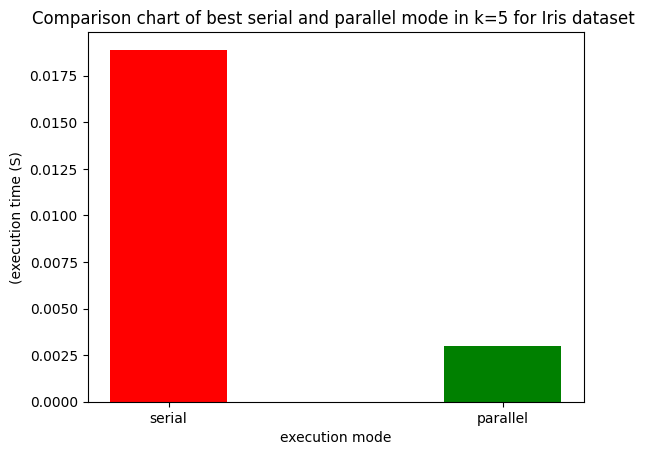

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time
import dask
import dask.array as da

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

best_serial_execution_time = float('inf')
best_accuracy_serial = []

for _ in range(10):
    start_time_serial = time.time()

    knn_serial = KNeighborsClassifier(n_neighbors=5)
    knn_serial.fit(X_train, y_train)
    accuracy_serial = knn_serial.score(X_test, y_test)

    end_time_serial = time.time()
    serial_execution_time = end_time_serial - start_time_serial

    best_accuracy_serial.append(accuracy_serial)

    if serial_execution_time < best_serial_execution_time:
        best_serial_execution_time = serial_execution_time

print(f"best_serial_execution_time: {best_serial_execution_time:.4f} S")
print(f"best_accuracy_serial: {np.mean(best_accuracy_serial):.4f}")

best_parallel_execution_time = float('inf')
best_accuracy_parallel = []

for _ in range(10):
    data_dask = da.from_array(X, chunks=(50, 4))
    labels_dask = da.from_array(y, chunks=50)

    start_time_parallel = time.time()

    knn_parallel = KNeighborsClassifier(n_neighbors=5)
    knn_parallel.fit(data_dask, labels_dask)

    end_time_parallel = time.time()
    parallel_execution_time = end_time_parallel - start_time_parallel

    if parallel_execution_time < best_parallel_execution_time:
        best_parallel_execution_time = parallel_execution_time

        X_test_dask = da.from_array(X_test, chunks=(50, 4))
        y_test_dask = da.from_array(y_test, chunks=50)

        predictions_parallel = knn_parallel.predict(X_test_dask)
        accuracy_parallel = da.mean(predictions_parallel == y_test_dask).compute()
        best_accuracy_parallel.append(accuracy_parallel)

print(f"best_parallel_execution_time: {best_parallel_execution_time:.4f} S")
print(f"best_accuracy_parallel: {np.mean(best_accuracy_parallel):.4f}")

labels = ['serial', 'parallel']
execution_times = [best_serial_execution_time, best_parallel_execution_time]

x = np.arange(len(labels))
width = 0.35
colors = ['red', 'green']

fig, ax = plt.subplots()
rects = ax.bar(x, execution_times, width, color=colors)
ax.set_xlabel('execution mode')
ax.set_ylabel('(execution time (S)')
ax.set_title('Comparison chart of best serial and parallel mode in k=5 for Iris dataset ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

Dataset: iris , K = 7

best_serial_execution_time: 0.0061 S
best_accuracy_serial: 1.0000
best_parallel_execution_time: 0.0027 S
best_accuracy_parallel: 1.0000


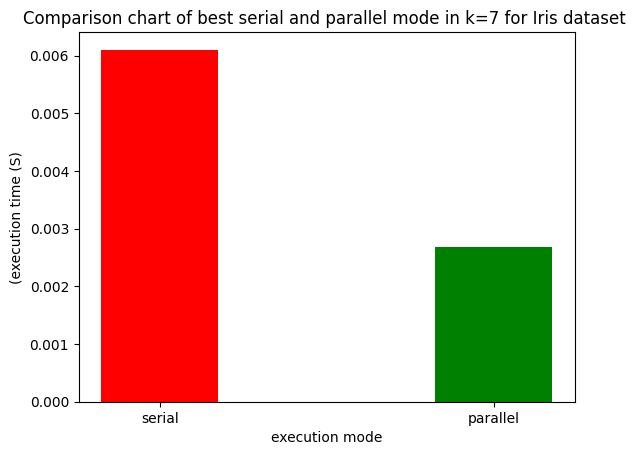

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time
import dask
import dask.array as da

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

best_serial_execution_time = float('inf')
best_accuracy_serial = []

for _ in range(10):
    start_time_serial = time.time()

    knn_serial = KNeighborsClassifier(n_neighbors=7)
    knn_serial.fit(X_train, y_train)
    accuracy_serial = knn_serial.score(X_test, y_test)

    end_time_serial = time.time()
    serial_execution_time = end_time_serial - start_time_serial

    best_accuracy_serial.append(accuracy_serial)

    if serial_execution_time < best_serial_execution_time:
        best_serial_execution_time = serial_execution_time

print(f"best_serial_execution_time: {best_serial_execution_time:.4f} S")
print(f"best_accuracy_serial: {np.mean(best_accuracy_serial):.4f}")

best_parallel_execution_time = float('inf')
best_accuracy_parallel = []

for _ in range(10):
    data_dask = da.from_array(X, chunks=(50, 4))
    labels_dask = da.from_array(y, chunks=50)

    start_time_parallel = time.time()

    knn_parallel = KNeighborsClassifier(n_neighbors=7)
    knn_parallel.fit(data_dask, labels_dask)

    end_time_parallel = time.time()
    parallel_execution_time = end_time_parallel - start_time_parallel

    if parallel_execution_time < best_parallel_execution_time:
        best_parallel_execution_time = parallel_execution_time

        X_test_dask = da.from_array(X_test, chunks=(50, 4))
        y_test_dask = da.from_array(y_test, chunks=50)

        predictions_parallel = knn_parallel.predict(X_test_dask)
        accuracy_parallel = da.mean(predictions_parallel == y_test_dask).compute()
        best_accuracy_parallel.append(accuracy_parallel)

print(f"best_parallel_execution_time: {best_parallel_execution_time:.4f} S")
print(f"best_accuracy_parallel: {np.mean(best_accuracy_parallel):.4f}")

labels = ['serial', 'parallel']
execution_times = [best_serial_execution_time, best_parallel_execution_time]

x = np.arange(len(labels))
width = 0.35
colors = ['red', 'green']

fig, ax = plt.subplots()
rects = ax.bar(x, execution_times, width, color=colors)
ax.set_xlabel('execution mode')
ax.set_ylabel('(execution time (S)')
ax.set_title('Comparison chart of best serial and parallel mode in k=7 for Iris dataset ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

Dataset: breast_cancer , K = 3


best_serial_execution_time: 0.0113 S
best_accuracy_serial: 0.9123
best_parallel_execution_time: 0.0025 S
best_accuracy_parallel: 0.9561


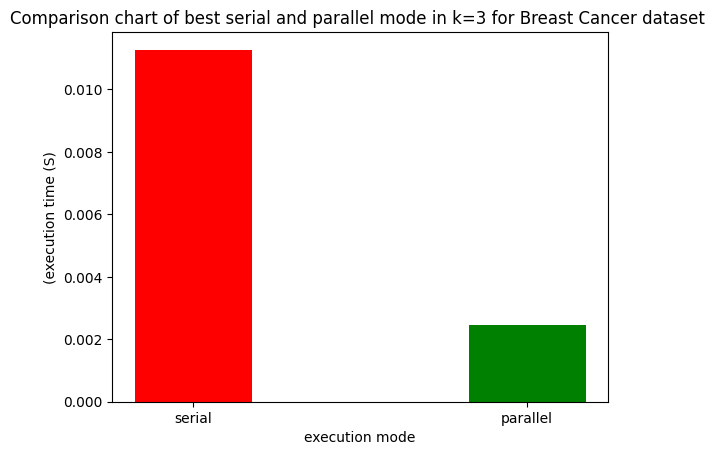

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time
import dask
import dask.array as da

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

best_serial_execution_time = float('inf')
best_accuracy_serial = []

for _ in range(10):
    start_time_serial = time.time()

    knn_serial = KNeighborsClassifier(n_neighbors=3)
    knn_serial.fit(X_train, y_train)
    accuracy_serial = knn_serial.score(X_test, y_test)

    end_time_serial = time.time()
    serial_execution_time = end_time_serial - start_time_serial

    best_accuracy_serial.append(accuracy_serial)

    if serial_execution_time < best_serial_execution_time:
        best_serial_execution_time = serial_execution_time

print(f"best_serial_execution_time: {best_serial_execution_time:.4f} S")
print(f"best_accuracy_serial: {np.mean(best_accuracy_serial):.4f}")

best_parallel_execution_time = float('inf')
best_accuracy_parallel = []

for _ in range(10):
    data_dask = da.from_array(X, chunks=(50, 30))
    labels_dask = da.from_array(y, chunks=50)

    start_time_parallel = time.time()

    knn_parallel = KNeighborsClassifier(n_neighbors=3)
    knn_parallel.fit(data_dask, labels_dask)

    end_time_parallel = time.time()
    parallel_execution_time = end_time_parallel - start_time_parallel

    if parallel_execution_time < best_parallel_execution_time:
        best_parallel_execution_time = parallel_execution_time

        X_test_dask = da.from_array(X_test, chunks=(50, 30))
        y_test_dask = da.from_array(y_test, chunks=50)

        predictions_parallel = knn_parallel.predict(X_test_dask)
        accuracy_parallel = da.mean(predictions_parallel == y_test_dask).compute()
        best_accuracy_parallel.append(accuracy_parallel)

print(f"best_parallel_execution_time: {best_parallel_execution_time:.4f} S")
print(f"best_accuracy_parallel: {np.mean(best_accuracy_parallel):.4f}")

labels = ['serial', 'parallel']
execution_times = [best_serial_execution_time, best_parallel_execution_time]

x = np.arange(len(labels))
width = 0.35
colors = ['red', 'green']

fig, ax = plt.subplots()
rects = ax.bar(x, execution_times, width, color=colors)
ax.set_xlabel('execution mode')
ax.set_ylabel('(execution time (S)')
ax.set_title('Comparison chart of best serial and parallel mode in k=3 for Breast Cancer dataset ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

Dataset: breast_cancer , K = 5

best_serial_execution_time: 0.0092 S
best_accuracy_serial: 0.9386
best_parallel_execution_time: 0.0019 S
best_accuracy_parallel: 0.9474


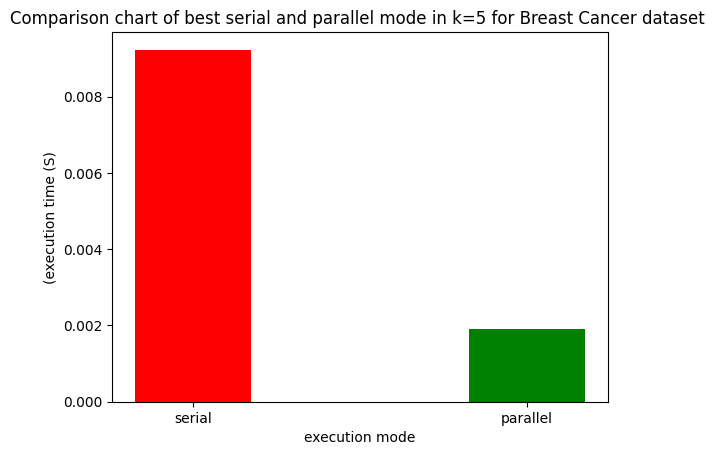

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time
import dask
import dask.array as da

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

best_serial_execution_time = float('inf')
best_accuracy_serial = []

for _ in range(10):
    start_time_serial = time.time()

    knn_serial = KNeighborsClassifier(n_neighbors=5)
    knn_serial.fit(X_train, y_train)
    accuracy_serial = knn_serial.score(X_test, y_test)

    end_time_serial = time.time()
    serial_execution_time = end_time_serial - start_time_serial

    best_accuracy_serial.append(accuracy_serial)

    if serial_execution_time < best_serial_execution_time:
        best_serial_execution_time = serial_execution_time

print(f"best_serial_execution_time: {best_serial_execution_time:.4f} S")
print(f"best_accuracy_serial: {np.mean(best_accuracy_serial):.4f}")

best_parallel_execution_time = float('inf')
best_accuracy_parallel = []

for _ in range(10):
    data_dask = da.from_array(X, chunks=(50, 30))
    labels_dask = da.from_array(y, chunks=50)

    start_time_parallel = time.time()

    knn_parallel = KNeighborsClassifier(n_neighbors=5)
    knn_parallel.fit(data_dask, labels_dask)

    end_time_parallel = time.time()
    parallel_execution_time = end_time_parallel - start_time_parallel

    if parallel_execution_time < best_parallel_execution_time:
        best_parallel_execution_time = parallel_execution_time

        X_test_dask = da.from_array(X_test, chunks=(50, 30))
        y_test_dask = da.from_array(y_test, chunks=50)

        predictions_parallel = knn_parallel.predict(X_test_dask)
        accuracy_parallel = da.mean(predictions_parallel == y_test_dask).compute()
        best_accuracy_parallel.append(accuracy_parallel)

print(f"best_parallel_execution_time: {best_parallel_execution_time:.4f} S")
print(f"best_accuracy_parallel: {np.mean(best_accuracy_parallel):.4f}")

labels = ['serial', 'parallel']
execution_times = [best_serial_execution_time, best_parallel_execution_time]

x = np.arange(len(labels))
width = 0.35
colors = ['red', 'green']

fig, ax = plt.subplots()
rects = ax.bar(x, execution_times, width, color=colors)
ax.set_xlabel('execution mode')
ax.set_ylabel('(execution time (S)')
ax.set_title('Comparison chart of best serial and parallel mode in k=5 for Breast Cancer dataset ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

Dataset: breast_cancer , K = 7

best_serial_execution_time: 0.0108 S
best_accuracy_serial: 0.9474
best_parallel_execution_time: 0.0033 S
best_accuracy_parallel: 0.9561


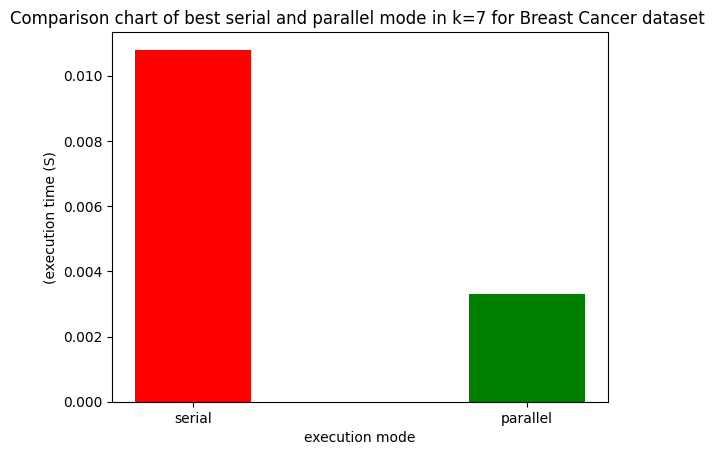

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time
import dask
import dask.array as da

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

best_serial_execution_time = float('inf')
best_accuracy_serial = []

for _ in range(10):
    start_time_serial = time.time()

    knn_serial = KNeighborsClassifier(n_neighbors=7)
    knn_serial.fit(X_train, y_train)
    accuracy_serial = knn_serial.score(X_test, y_test)

    end_time_serial = time.time()
    serial_execution_time = end_time_serial - start_time_serial

    best_accuracy_serial.append(accuracy_serial)

    if serial_execution_time < best_serial_execution_time:
        best_serial_execution_time = serial_execution_time

print(f"best_serial_execution_time: {best_serial_execution_time:.4f} S")
print(f"best_accuracy_serial: {np.mean(best_accuracy_serial):.4f}")

best_parallel_execution_time = float('inf')
best_accuracy_parallel = []

for _ in range(10):
    data_dask = da.from_array(X, chunks=(50, 30))
    labels_dask = da.from_array(y, chunks=50)

    start_time_parallel = time.time()

    knn_parallel = KNeighborsClassifier(n_neighbors=7)
    knn_parallel.fit(data_dask, labels_dask)

    end_time_parallel = time.time()
    parallel_execution_time = end_time_parallel - start_time_parallel

    if parallel_execution_time < best_parallel_execution_time:
        best_parallel_execution_time = parallel_execution_time

        X_test_dask = da.from_array(X_test, chunks=(50, 30))
        y_test_dask = da.from_array(y_test, chunks=50)

        predictions_parallel = knn_parallel.predict(X_test_dask)
        accuracy_parallel = da.mean(predictions_parallel == y_test_dask).compute()
        best_accuracy_parallel.append(accuracy_parallel)

print(f"best_parallel_execution_time: {best_parallel_execution_time:.4f} S")
print(f"best_accuracy_parallel: {np.mean(best_accuracy_parallel):.4f}")

labels = ['serial', 'parallel']
execution_times = [best_serial_execution_time, best_parallel_execution_time]

x = np.arange(len(labels))
width = 0.35
colors = ['red', 'green']

fig, ax = plt.subplots()
rects = ax.bar(x, execution_times, width, color=colors)
ax.set_xlabel('execution mode')
ax.set_ylabel('(execution time (S)')
ax.set_title('Comparison chart of best serial and parallel mode in k=7 for Breast Cancer dataset ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

Dataset: mnist , K = 3

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


best_serial_execution_time: 41.7340 s
best_accuracy_serial: 0.9718
best_parallel_execution_time: 0.3477 s
best_accuracy_parallel: 0.9871


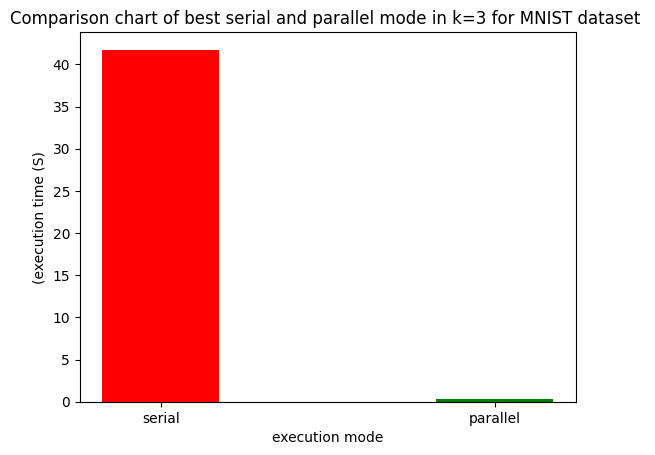

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time
import dask
import dask.array as da

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.to_numpy()  # تبدیل داده‌های X به NumPy array
y = y.to_numpy()  # تبدیل داده‌های y به NumPy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

best_serial_execution_time = float('inf')
best_accuracy_serial = 0

for _ in range(10):
    start_time_serial = time.time()

    knn_serial = KNeighborsClassifier(n_neighbors=3)
    knn_serial.fit(X_train, y_train)
    accuracy_serial = knn_serial.score(X_test, y_test)

    end_time_serial = time.time()
    serial_execution_time = end_time_serial - start_time_serial

    if serial_execution_time < best_serial_execution_time:
        best_serial_execution_time = serial_execution_time
        best_accuracy_serial = accuracy_serial

print(f"best_serial_execution_time: {best_serial_execution_time:.4f} s")
print(f"best_accuracy_serial: {best_accuracy_serial:.4f}")

best_parallel_execution_time = float('inf')
best_accuracy_parallel = 0

for _ in range(10):
    data_dask = da.from_array(X, chunks=(1000, 784))
    labels_dask = da.from_array(y, chunks=1000)

    start_time_parallel = time.time()

    knn_parallel = KNeighborsClassifier(n_neighbors=3)
    knn_parallel.fit(data_dask, labels_dask)

    end_time_parallel = time.time()
    parallel_execution_time = end_time_parallel - start_time_parallel

    if parallel_execution_time < best_parallel_execution_time:
        best_parallel_execution_time = parallel_execution_time

        X_test_dask = da.from_array(X_test, chunks=(1000, 784))
        y_test_dask = da.from_array(y_test, chunks=1000)

        predictions_parallel = knn_parallel.predict(X_test_dask)
        best_accuracy_parallel = da.mean(predictions_parallel == y_test_dask).compute()

print(f"best_parallel_execution_time: {best_parallel_execution_time:.4f} s")
print(f"best_accuracy_parallel: {best_accuracy_parallel:.4f}")

labels = ['serial', 'parallel']
execution_times = [best_serial_execution_time, best_parallel_execution_time]

x = np.arange(len(labels))
width = 0.35
colors = ['red', 'green']

fig, ax = plt.subplots()
rects = ax.bar(x, execution_times, width, color=colors)
ax.set_xlabel('execution mode')
ax.set_ylabel('(execution time (S)')
ax.set_title('Comparison chart of best serial and parallel mode in k=3 for MNIST dataset ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

Dataset: mnist , K = 5

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


best_serial_execution_time: 41.7704 s
best_accuracy_serial: 0.9694
best_parallel_execution_time: 0.3398 s
best_accuracy_parallel: 0.9819


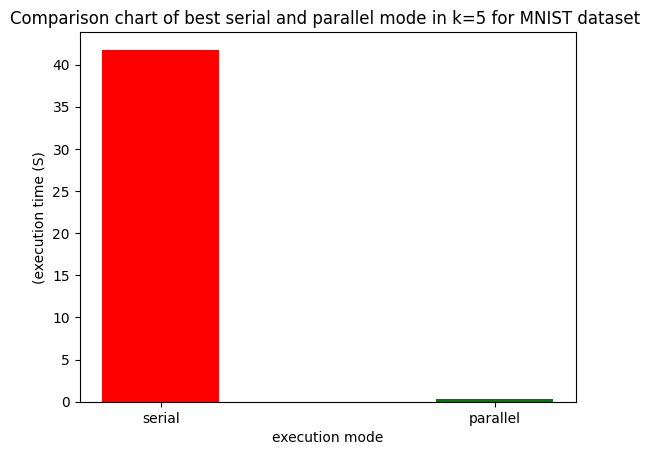

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time
import dask
import dask.array as da

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.to_numpy()  # تبدیل داده‌های X به NumPy array
y = y.to_numpy()  # تبدیل داده‌های y به NumPy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

best_serial_execution_time = float('inf')
best_accuracy_serial = 0

for _ in range(10):
    start_time_serial = time.time()

    knn_serial = KNeighborsClassifier(n_neighbors=5)
    knn_serial.fit(X_train, y_train)
    accuracy_serial = knn_serial.score(X_test, y_test)

    end_time_serial = time.time()
    serial_execution_time = end_time_serial - start_time_serial

    if serial_execution_time < best_serial_execution_time:
        best_serial_execution_time = serial_execution_time
        best_accuracy_serial = accuracy_serial

print(f"best_serial_execution_time: {best_serial_execution_time:.4f} s")
print(f"best_accuracy_serial: {best_accuracy_serial:.4f}")

best_parallel_execution_time = float('inf')
best_accuracy_parallel = 0

for _ in range(10):
    data_dask = da.from_array(X, chunks=(1000, 784))
    labels_dask = da.from_array(y, chunks=1000)

    start_time_parallel = time.time()

    knn_parallel = KNeighborsClassifier(n_neighbors=5)
    knn_parallel.fit(data_dask, labels_dask)

    end_time_parallel = time.time()
    parallel_execution_time = end_time_parallel - start_time_parallel

    if parallel_execution_time < best_parallel_execution_time:
        best_parallel_execution_time = parallel_execution_time

        X_test_dask = da.from_array(X_test, chunks=(1000, 784))
        y_test_dask = da.from_array(y_test, chunks=1000)

        predictions_parallel = knn_parallel.predict(X_test_dask)
        best_accuracy_parallel = da.mean(predictions_parallel == y_test_dask).compute()

print(f"best_parallel_execution_time: {best_parallel_execution_time:.4f} s")
print(f"best_accuracy_parallel: {best_accuracy_parallel:.4f}")

labels = ['serial', 'parallel']
execution_times = [best_serial_execution_time, best_parallel_execution_time]

x = np.arange(len(labels))
width = 0.35
colors = ['red', 'green']

fig, ax = plt.subplots()
rects = ax.bar(x, execution_times, width, color=colors)
ax.set_xlabel('execution mode')
ax.set_ylabel('(execution time (S)')
ax.set_title('Comparison chart of best serial and parallel mode in k=5 for MNIST dataset ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

Dataset: mnist , K = 7

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


best_serial_execution_time: 41.4926 s
best_accuracy_serial: 0.9693
best_parallel_execution_time: 0.3963 s
best_accuracy_parallel: 0.9792


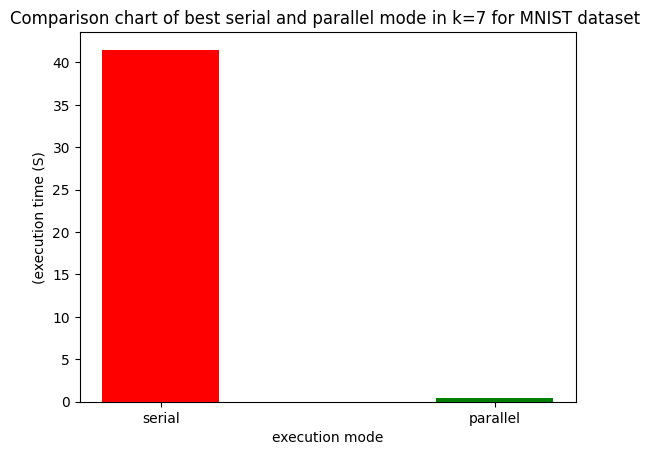

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time
import dask
import dask.array as da

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.to_numpy()  # تبدیل داده‌های X به NumPy array
y = y.to_numpy()  # تبدیل داده‌های y به NumPy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

best_serial_execution_time = float('inf')
best_accuracy_serial = 0

for _ in range(10):
    start_time_serial = time.time()

    knn_serial = KNeighborsClassifier(n_neighbors=7)
    knn_serial.fit(X_train, y_train)
    accuracy_serial = knn_serial.score(X_test, y_test)

    end_time_serial = time.time()
    serial_execution_time = end_time_serial - start_time_serial

    if serial_execution_time < best_serial_execution_time:
        best_serial_execution_time = serial_execution_time
        best_accuracy_serial = accuracy_serial

print(f"best_serial_execution_time: {best_serial_execution_time:.4f} s")
print(f"best_accuracy_serial: {best_accuracy_serial:.4f}")

best_parallel_execution_time = float('inf')
best_accuracy_parallel = 0

for _ in range(10):
    data_dask = da.from_array(X, chunks=(1000, 784))
    labels_dask = da.from_array(y, chunks=1000)

    start_time_parallel = time.time()

    knn_parallel = KNeighborsClassifier(n_neighbors=7)
    knn_parallel.fit(data_dask, labels_dask)

    end_time_parallel = time.time()
    parallel_execution_time = end_time_parallel - start_time_parallel

    if parallel_execution_time < best_parallel_execution_time:
        best_parallel_execution_time = parallel_execution_time

        X_test_dask = da.from_array(X_test, chunks=(1000, 784))
        y_test_dask = da.from_array(y_test, chunks=1000)

        predictions_parallel = knn_parallel.predict(X_test_dask)
        best_accuracy_parallel = da.mean(predictions_parallel == y_test_dask).compute()

print(f"best_parallel_execution_time: {best_parallel_execution_time:.4f} s")
print(f"best_accuracy_parallel: {best_accuracy_parallel:.4f}")

labels = ['serial', 'parallel']
execution_times = [best_serial_execution_time, best_parallel_execution_time]

x = np.arange(len(labels))
width = 0.35
colors = ['red', 'green']

fig, ax = plt.subplots()
rects = ax.bar(x, execution_times, width, color=colors)
ax.set_xlabel('execution mode')
ax.set_ylabel('(execution time (S)')
ax.set_title('Comparison chart of best serial and parallel mode in k=7 for MNIST dataset ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Iteration 1:
Serial execution time: 45.7827 s
Serial accuracy: 0.9693
Parallel execution time: 0.5032 s
Parallel accuracy: 0.9792

Iteration 2:
Serial execution time: 54.1174 s
Serial accuracy: 0.9693
Parallel execution time: 0.4430 s
Parallel accuracy: 0.9792

Iteration 3:
Serial execution time: 46.2867 s
Serial accuracy: 0.9693
Parallel execution time: 0.4343 s
Parallel accuracy: 0.9792

Iteration 4:
Serial execution time: 42.4397 s
Serial accuracy: 0.9693
Parallel execution time: 0.4065 s
Parallel accuracy: 0.9792

Iteration 5:
Serial execution time: 42.2481 s
Serial accuracy: 0.9693
Parallel execution time: 0.3859 s
Parallel accuracy: 0.9792

Iteration 6:
Serial execution time: 42.0231 s
Serial accuracy: 0.9693
Parallel execution time: 0.3708 s
Parallel accuracy: 0.9792

Iteration 7:
Serial execution time: 41.7757 s
Serial accuracy: 0.9693
Parallel execution time: 0.3681 s
Parallel accuracy: 0.9792

Iteration 8:
Serial execution time: 43.4071 s
Serial accuracy: 0.9693
Parallel exec

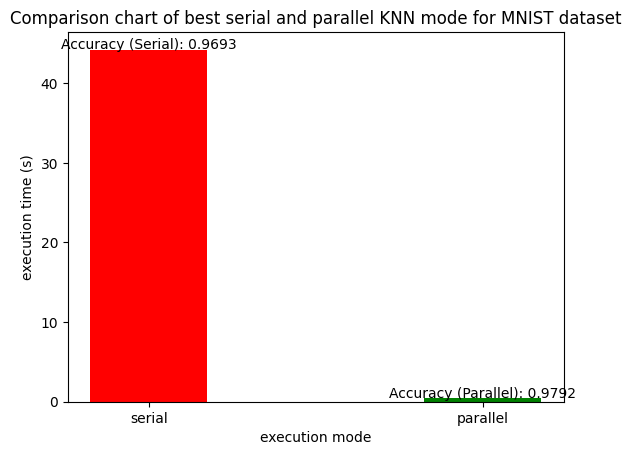

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time
import dask
import dask.array as da

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.to_numpy()  # Convert X data to NumPy array
y = y.to_numpy()  # Convert y data to NumPy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

num_iterations = 10

serial_execution_times = []
serial_accuracies = []
parallel_execution_times = []
parallel_accuracies = []

for _ in range(num_iterations):
    # Serial execution
    start_time_serial = time.time()

    knn_serial = KNeighborsClassifier(n_neighbors=7)
    knn_serial.fit(X_train, y_train)
    accuracy_serial = knn_serial.score(X_test, y_test)

    end_time_serial = time.time()
    serial_execution_time = end_time_serial - start_time_serial

    serial_execution_times.append(serial_execution_time)
    serial_accuracies.append(accuracy_serial)

    # Parallel execution
    data_dask = da.from_array(X, chunks=(1000, 784))
    labels_dask = da.from_array(y, chunks=1000)

    start_time_parallel = time.time()

    knn_parallel = KNeighborsClassifier(n_neighbors=7)
    knn_parallel.fit(data_dask, labels_dask)

    end_time_parallel = time.time()
    parallel_execution_time = end_time_parallel - start_time_parallel

    parallel_execution_times.append(parallel_execution_time)

    X_test_dask = da.from_array(X_test, chunks=(1000, 784))
    y_test_dask = da.from_array(y_test, chunks=1000)

    predictions_parallel = knn_parallel.predict(X_test_dask)
    accuracy_parallel = da.mean(predictions_parallel == y_test_dask).compute()

    parallel_accuracies.append(accuracy_parallel)

    # Print results for each iteration
    print(f"Iteration {_+1}:")
    print(f"Serial execution time: {serial_execution_time:.4f} s")
    print(f"Serial accuracy: {accuracy_serial:.4f}")
    print(f"Parallel execution time: {parallel_execution_time:.4f} s")
    print(f"Parallel accuracy: {accuracy_parallel:.4f}\n")

labels = ['serial', 'parallel']
execution_times = [np.mean(serial_execution_times), np.mean(parallel_execution_times)]

x = np.arange(len(labels))
width = 0.35
colors = ['red', 'green']
plt.bar(x, execution_times, width, color=colors)
plt.xlabel('execution mode')
plt.ylabel('execution time (s)')
plt.title('Comparison chart of best serial and parallel KNN mode for MNIST dataset')
plt.xticks(x, labels)

serial_accuracy_mean = np.mean(serial_accuracies)
parallel_accuracy_mean = np.mean(parallel_accuracies)
plt.text(0, execution_times[0] + 0.1, f"Accuracy (Serial): {serial_accuracy_mean:.4f}", ha='center', color='black')
plt.text(1, execution_times[1] + 0.1, f"Accuracy (Parallel): {parallel_accuracy_mean:.4f}", ha='center', color='black')

plt.show()

Serial Run 1 - Execution Time: 71.7481 s, Accuracy: 0.9707
Serial Run 2 - Execution Time: 73.6921 s, Accuracy: 0.9707
Serial Run 3 - Execution Time: 72.3129 s, Accuracy: 0.9707
Serial Run 4 - Execution Time: 72.6805 s, Accuracy: 0.9707
Serial Run 5 - Execution Time: 72.5828 s, Accuracy: 0.9707
Serial Run 6 - Execution Time: 72.2702 s, Accuracy: 0.9707
Serial Run 7 - Execution Time: 73.0665 s, Accuracy: 0.9707
Serial Run 8 - Execution Time: 72.3983 s, Accuracy: 0.9707
Serial Run 9 - Execution Time: 72.6032 s, Accuracy: 0.9707
Serial Run 10 - Execution Time: 73.3030 s, Accuracy: 0.9707
Best Serial Execution Time: 71.7481 s, Best Accuracy: 0.9707
Parallel Run 1 - Execution Time: 0.3064 s, Accuracy: 0.9836
Parallel Run 2 - Execution Time: 0.3129 s, Accuracy: 0.9836
Parallel Run 3 - Execution Time: 0.3185 s, Accuracy: 0.9836
Parallel Run 4 - Execution Time: 0.3085 s, Accuracy: 0.9836
Parallel Run 5 - Execution Time: 0.3063 s, Accuracy: 0.9836
Parallel Run 6 - Execution Time: 0.3075 s, Accur

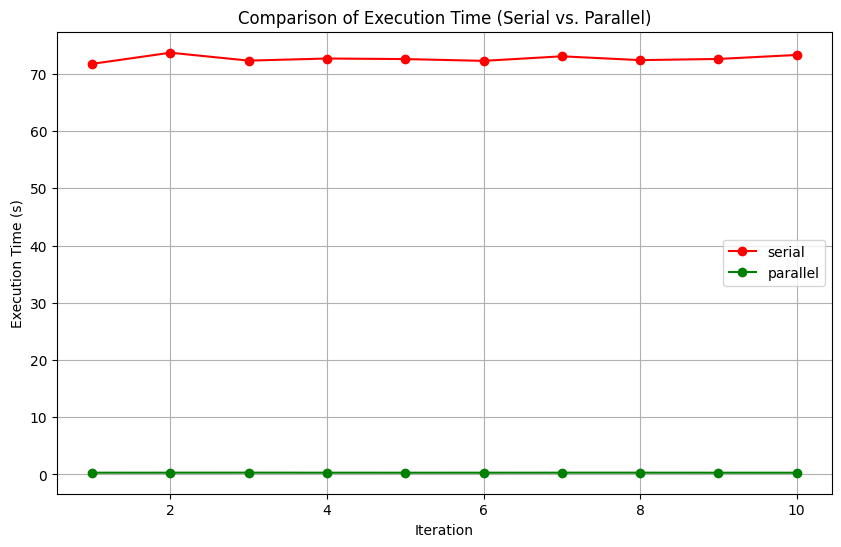

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time
import dask
import dask.array as da

random_state = 0
n_samples = 100000
n_features = 1000
n_informative = int(n_features * 0.8)
X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    random_state=random_state
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Serial Execution
serial_execution_times = []
best_serial_execution_time = float('inf')
best_accuracy_serial = 0

for _ in range(10):
    start_time_serial = time.time()

    knn_serial = KNeighborsClassifier(n_neighbors=10)
    knn_serial.fit(X_train, y_train)
    accuracy_serial = knn_serial.score(X_test, y_test)

    end_time_serial = time.time()
    serial_execution_time = end_time_serial - start_time_serial

    serial_execution_times.append(serial_execution_time)

    if serial_execution_time < best_serial_execution_time:
        best_serial_execution_time = serial_execution_time
        best_accuracy_serial = accuracy_serial

    print(f"Serial Run {_ + 1} - Execution Time: {serial_execution_time:.4f} s, Accuracy: {accuracy_serial:.4f}")

print(f"Best Serial Execution Time: {best_serial_execution_time:.4f} s, Best Accuracy: {best_accuracy_serial:.4f}")

# Parallel Execution
parallel_execution_times = []
best_parallel_execution_time = float('inf')
best_accuracy_parallel = 0

for _ in range(10):
    data_dask = da.from_array(X, chunks=(1000, n_features))
    labels_dask = da.from_array(y, chunks=1000)

    start_time_parallel = time.time()

    knn_parallel = KNeighborsClassifier(n_neighbors=10)
    knn_parallel.fit(data_dask, labels_dask)

    end_time_parallel = time.time()
    parallel_execution_time = end_time_parallel - start_time_parallel

    parallel_execution_times.append(parallel_execution_time)

    if parallel_execution_time < best_parallel_execution_time:
        best_parallel_execution_time = parallel_execution_time

        X_test_dask = da.from_array(X_test, chunks=(1000, n_features))
        y_test_dask = da.from_array(y_test, chunks=1000)

        predictions_parallel = knn_parallel.predict(X_test_dask)
        best_accuracy_parallel = da.mean(predictions_parallel == y_test_dask).compute()

    print(f"Parallel Run {_ + 1} - Execution Time: {parallel_execution_time:.4f} s, Accuracy: {best_accuracy_parallel:.4f}")

print(f"Best Parallel Execution Time: {best_parallel_execution_time:.4f} s, Best Accuracy: {best_accuracy_parallel:.4f}")

# Plotting
iterations = range(1, 11)
plt.figure(figsize=(10, 6))
plt.plot(iterations, serial_execution_times, marker='o', label='serial', color='red')
plt.plot(iterations, parallel_execution_times, marker='o', label='parallel', color='green')
plt.xlabel('Iteration')
plt.ylabel('Execution Time (s)')
plt.title('Comparison of Execution Time (Serial vs. Parallel)')
plt.legend()
plt.grid(True)
plt.show()
